In [22]:
import os
import numpy as np
import scipy.ndimage

def resample_to_dim(image, new_dim):
    # Determine current pixel spacing
    resize_factor = new_dim / np.array(image.shape)
    
    image = scipy.ndimage.interpolation.zoom(image, resize_factor, mode='nearest')
    
    return image

def resample(image, spacing, new_spacing=[1,1,1]):
    
    resize_factor = spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = spacing / real_resize_factor
    
    image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')
    
    return image, new_spacing

TCGA-FG-A713
TCGA-DU-7015
TCGA-DU-6399
TCGA-HT-8107
TCGA-DU-6397
TCGA-DU-7014
TCGA-CS-4944
TCGA-CS-4943
TCGA-HT-8106
TCGA-DU-7300
TCGA-DU-7309
TCGA-HT-7690
TCGA-DU-5855
TCGA-DU-5852
TCGA-HT-A5RC
TCGA-HT-7608
TCGA-HT-8018
TCGA-DU-7301
TCGA-DU-7306
TCGA-FG-6692
TCGA-HT-7855
TCGA-DU-5853
TCGA-HT-7879
TCGA-DU-5849
TCGA-CS-6188
TCGA-DU-5871
TCGA-DU-6407
TCGA-CS-6186
TCGA-DU-6400
TCGA-HT-7884
TCGA-DU-8166
TCGA-DU-A6S2
TCGA-DU-8168


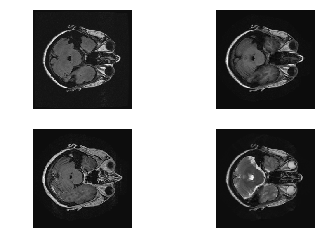

TCGA-CS-5395


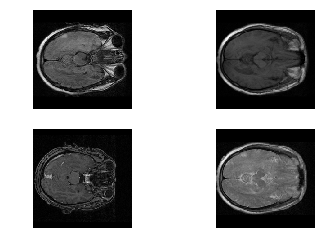

TCGA-DU-6401


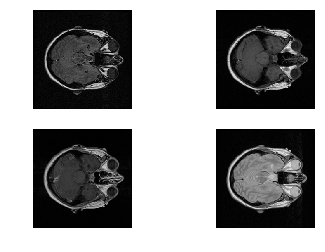

TCGA-HT-7882


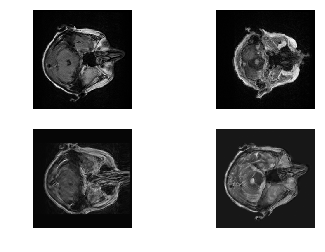

TCGA-DU-6408


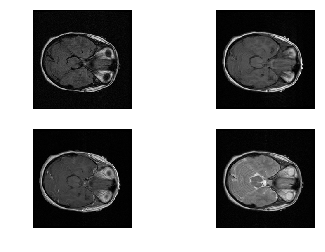

TCGA-DU-A6S3


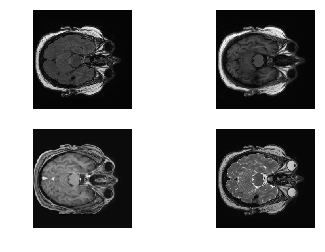

TCGA-DU-8167


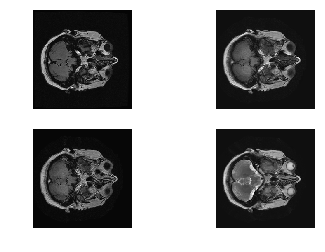

TCGA-HT-7684


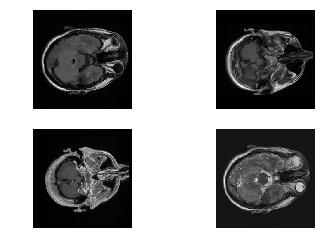

TCGA-DU-A5TY


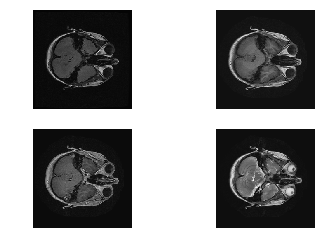

TCGA-DU-A5TP


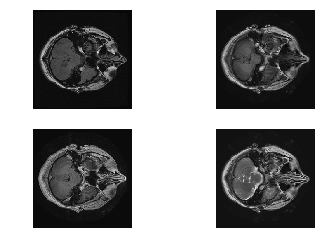

TCGA-DU-A5TW


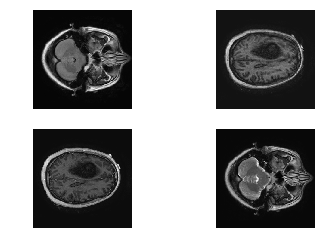

TCGA-CS-6666


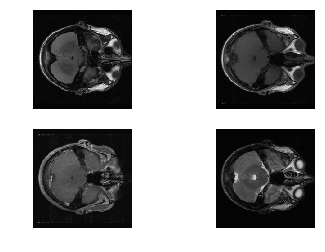

TCGA-DU-6542


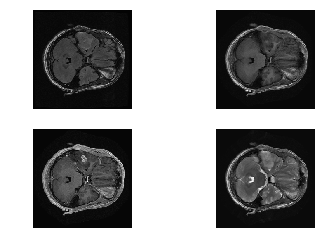

TCGA-CS-6668


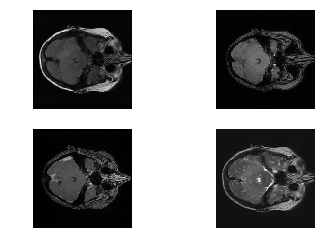

TCGA-DU-7294


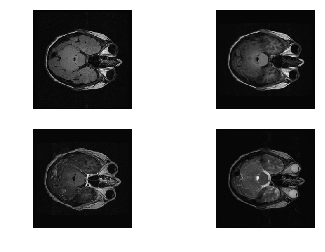

TCGA-FG-7643


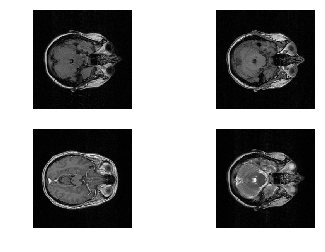

TCGA-DU-7008


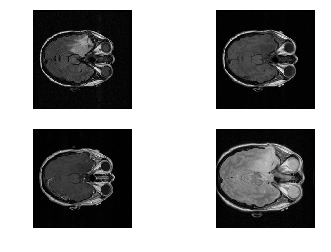

TCGA-CS-6669


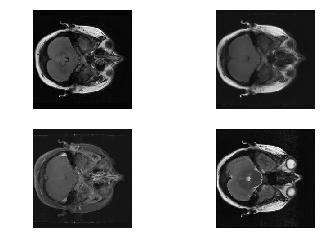

TCGA-HT-A614


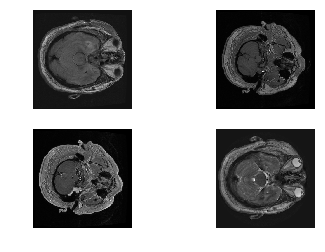

TCGA-FG-A6J1


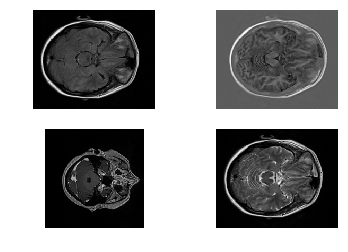

TCGA-CS-6667


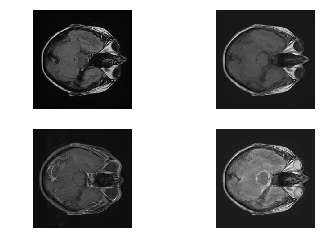

TCGA-EZ-7264A


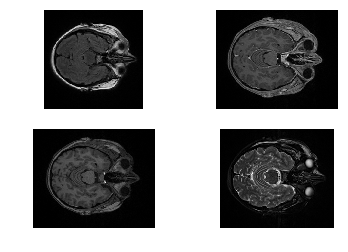

TCGA-CS-4941


FileNotFoundError: No such file: './data/TCGA_Glioma/LGG/TCGA-CS-4941/Flair_e1.nii'

In [39]:
# working with nii files
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline

path = './data/TCGA_Glioma/LGG'
output_dir = './data/TCGA_Glioma_preprocessed/LGG'
modalities = ['Flair', 'T1', 'T1c', 'T2']

for patient in os.listdir(path):
    if patient == '.DS_Store': continue
    i = 0
    print(patient)
    for modality in modalities:
        #load nii image
        if os.path.exists(os.path.join(output_dir, patient, modality+'.nii')):continue
        
        try:
            img = nib.load(os.path.join(path, patient, modality+'.nii'))
        except FileNotFoundError:
            img = nib.load(os.path.join(path, patient, modality+'_e1.nii'))

        #read nii header file to get physical spacing of pixels
        hdr = img.header
        pixdim = hdr['pixdim']
        spacing = np.array([pixdim[1], pixdim[2], pixdim[3]]) #[x, y, z]
#         print('spacing: ', spacing)
        
        img_array = np.array(img.dataobj)
#         print('original shape: ', img_array.shape)
        
        img_array, new_spacing = resample(img_array, spacing)
#         print('new shape: ', img_array.shape)
        
        #save resampled file
        if not os.path.isdir(os.path.join(output_dir, patient)):
            os.makedirs(os.path.join(output_dir, patient))
        new_img = nib.Nifti1Image(img_array, np.eye(4))
        new_img.to_filename(os.path.join(output_dir, patient, modality+'.nii'))
        
        plt.subplot(2, 2, i+1)
        plt.imshow(img_array[..., 50], cmap="gray")
        plt.axis('off')
        i+=1
    plt.show()

array([-1.       ,  0.917969 ,  0.9179688,  5.9999986,  1.       ,
        1.       ,  1.       ,  1.       ], dtype=float32)